In [6]:
# ==================================================================================
# TECH CHALLENGE FASE 3 - MACHINE LEARNING ENGINEERING
# VISUALIZAÇÕES DA EDA
# ==================================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

warnings.filterwarnings('ignore')

# Configurações de visualização aprimoradas
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("notebook", font_scale=1.2)
sns.set_palette("Set2")

print("="*80)
print("TECH CHALLENGE FASE 3 - VISUALIZAÇÕES DA EDA")
print("="*80)

TECH CHALLENGE FASE 3 - VISUALIZAÇÕES DA EDA


In [7]:
# Criar pasta para salvar as visualizações
output_dir = 'visualizacoes'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"✓ Pasta '{output_dir}' criada com sucesso!")
else:
    print(f"✓ Pasta '{output_dir}' já existe.")


✓ Pasta 'visualizacoes' já existe.


In [8]:
# ==================================================================================
# 1. CARREGAMENTO DOS DADOS
# ==================================================================================
print("\n1. Carregando dados...")

df_airlines = pd.read_csv('../data/airlines.csv')
df_airports = pd.read_csv('../data/airports.csv')
df_flights = pd.read_csv('../data/flights.csv')

# Filtrar voos não cancelados para análises de atraso
df_not_cancelled = df_flights[df_flights['CANCELLED'] == 0].copy()

# Criar variável de atraso binária
df_not_cancelled['IS_DELAYED'] = (df_not_cancelled['DEPARTURE_DELAY'] > 15).astype(int)

# Merge com nomes das companhias
df_flights_with_names = df_flights.merge(df_airlines, left_on='AIRLINE', right_on='IATA_CODE', how='left')

print("✓ Dados carregados!")



1. Carregando dados...
✓ Dados carregados!



2. Criando visualizações de distribuição de atrasos...


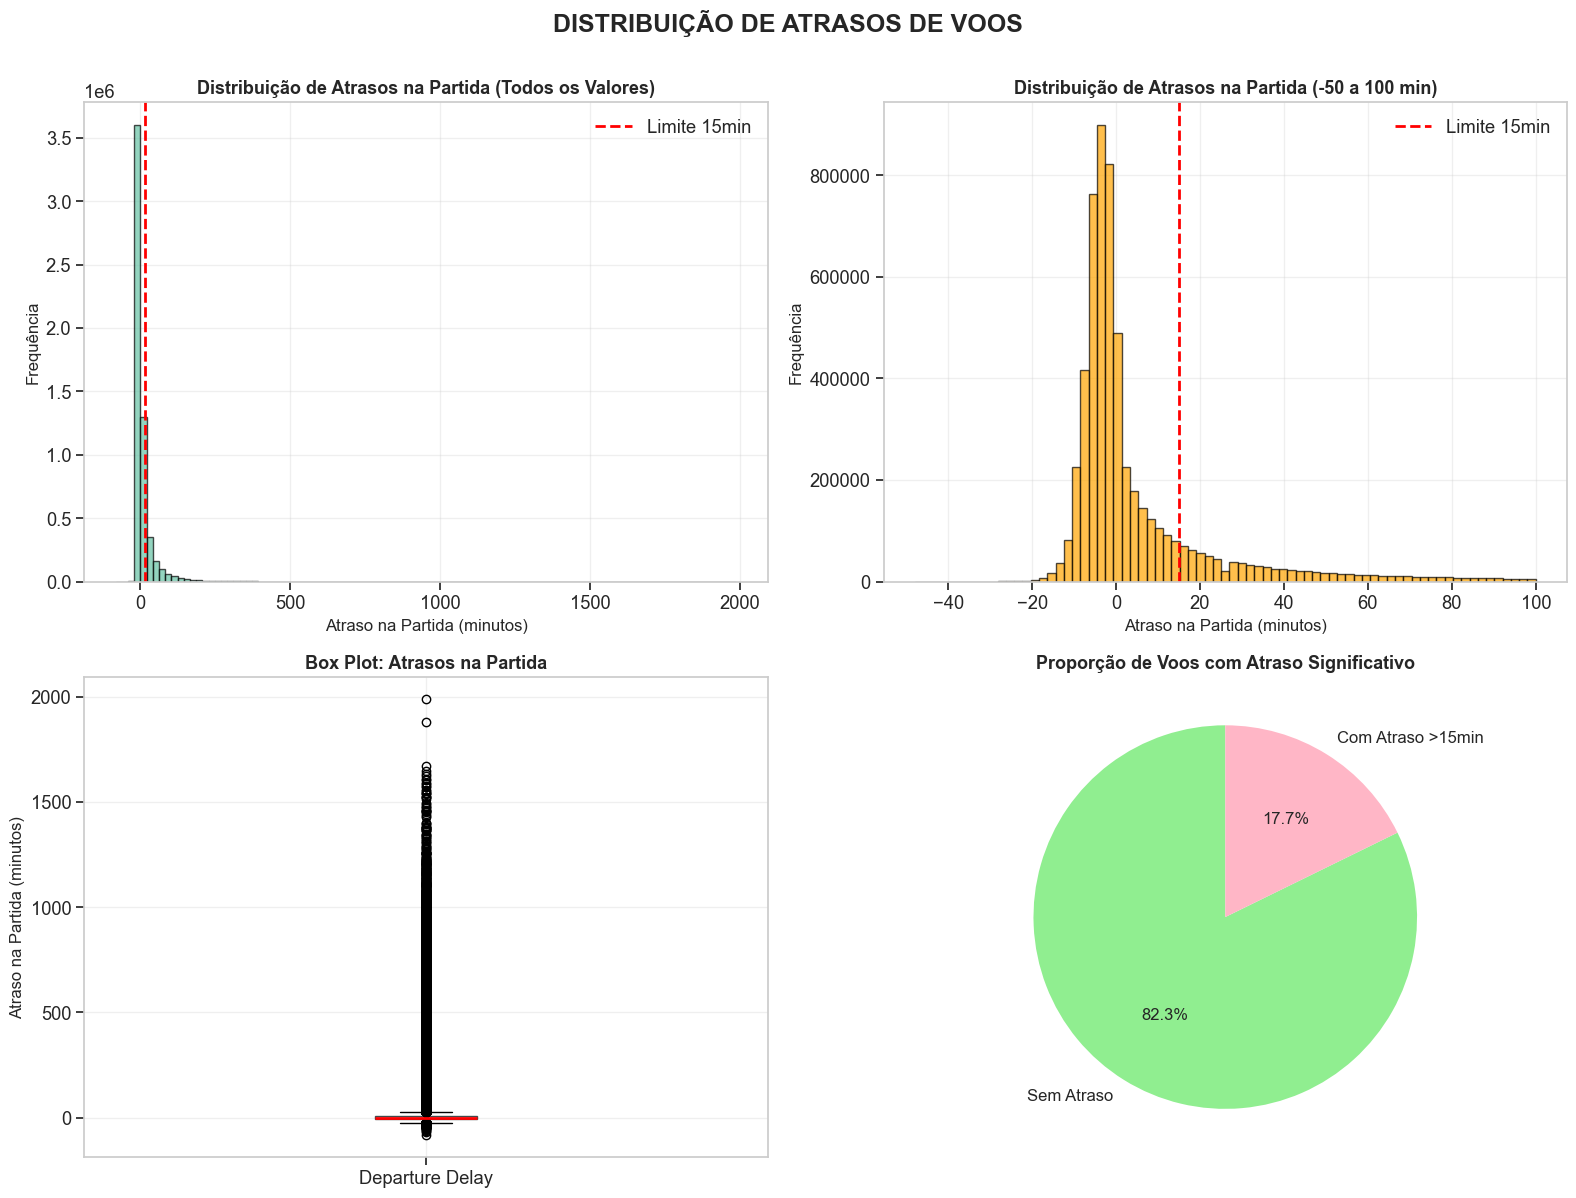

✓ Gráfico 1 salvo: visualizacoes/01_distribuicao_atrasos.png


In [9]:
# ==================================================================================
# 2. VISUALIZAÇÃO: DISTRIBUIÇÃO DE ATRASOS
# ==================================================================================
print("\n2. Criando visualizações de distribuição de atrasos...")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('DISTRIBUIÇÃO DE ATRASOS DE VOOS', fontsize=18, fontweight='bold', y=1.00)

# 2.1 Histograma de DEPARTURE_DELAY (todos os valores)
axes[0, 0].hist(df_not_cancelled['DEPARTURE_DELAY'].dropna(), bins=100, edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Atraso na Partida (minutos)', fontsize=12)
axes[0, 0].set_ylabel('Frequência', fontsize=12)
axes[0, 0].set_title('Distribuição de Atrasos na Partida (Todos os Valores)', fontsize=13, fontweight='bold')
axes[0, 0].axvline(x=15, color='red', linestyle='--', linewidth=2, label='Limite 15min')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2.2 Histograma de DEPARTURE_DELAY (filtrado -50 a 100 min)
delay_filtered = df_not_cancelled['DEPARTURE_DELAY'].dropna()
delay_filtered = delay_filtered[(delay_filtered >= -50) & (delay_filtered <= 100)]
axes[0, 1].hist(delay_filtered, bins=75, edgecolor='black', alpha=0.7, color='orange')
axes[0, 1].set_xlabel('Atraso na Partida (minutos)', fontsize=12)
axes[0, 1].set_ylabel('Frequência', fontsize=12)
axes[0, 1].set_title('Distribuição de Atrasos na Partida (-50 a 100 min)', fontsize=13, fontweight='bold')
axes[0, 1].axvline(x=15, color='red', linestyle='--', linewidth=2, label='Limite 15min')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 2.3 Box plot de DEPARTURE_DELAY
axes[1, 0].boxplot(df_not_cancelled['DEPARTURE_DELAY'].dropna(), vert=True, patch_artist=True,
                   boxprops=dict(facecolor='lightblue', alpha=0.7),
                   medianprops=dict(color='red', linewidth=2))
axes[1, 0].set_ylabel('Atraso na Partida (minutos)', fontsize=12)
axes[1, 0].set_title('Box Plot: Atrasos na Partida', fontsize=13, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_xticklabels(['Departure Delay'])

# 2.4 Proporção de voos com/sem atraso
delay_counts = df_not_cancelled['IS_DELAYED'].value_counts()
colors_pie = ['#90EE90', '#FFB6C6']
axes[1, 1].pie(delay_counts, labels=['Sem Atraso', 'Com Atraso >15min'], autopct='%1.1f%%',
               colors=colors_pie, startangle=90, textprops={'fontsize': 12})
axes[1, 1].set_title('Proporção de Voos com Atraso Significativo', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.savefig(f'{output_dir}/01_distribuicao_atrasos.png', 
            dpi=300, bbox_inches='tight')
plt.show()

print(f"✓ Gráfico 1 salvo: {output_dir}/01_distribuicao_atrasos.png")



3. Criando visualizações de análise temporal...


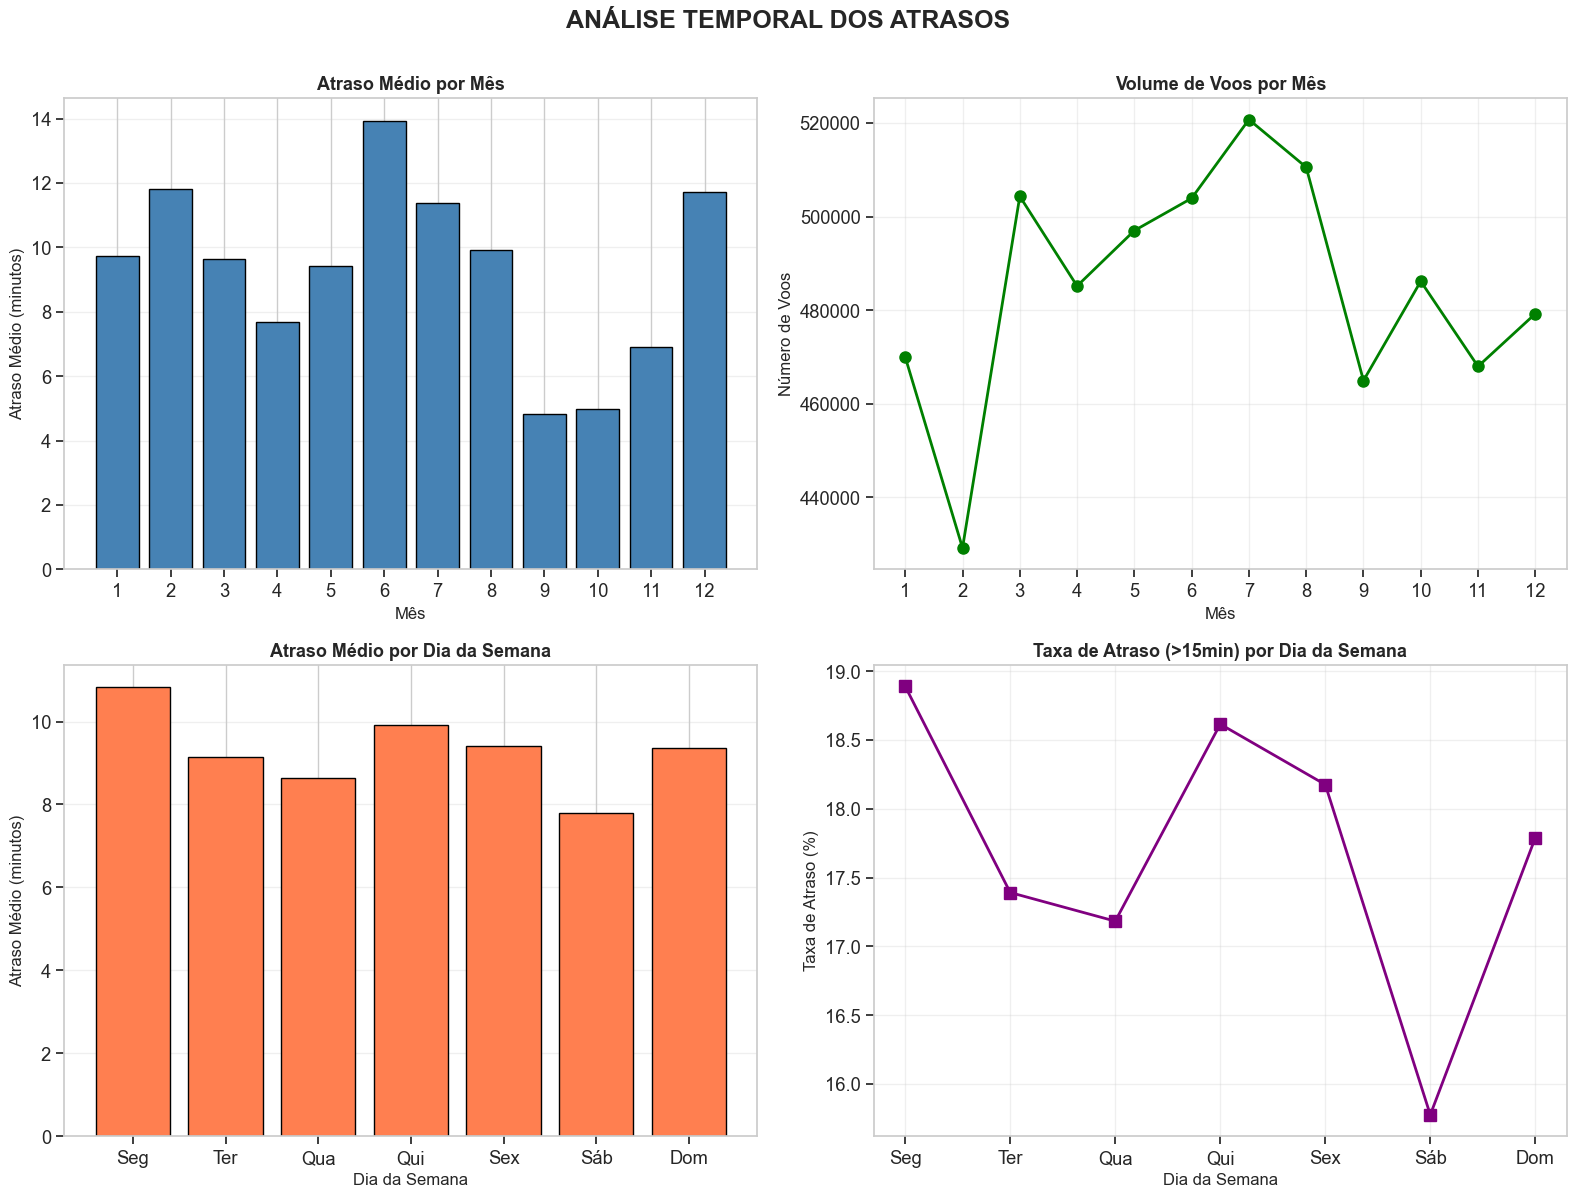

✓ Gráfico 2 salvo: visualizacoes/02_analise_temporal.png


In [10]:
# ==================================================================================
# 3. VISUALIZAÇÃO: ANÁLISE TEMPORAL
# ==================================================================================
print("\n3. Criando visualizações de análise temporal...")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('ANÁLISE TEMPORAL DOS ATRASOS', fontsize=18, fontweight='bold', y=1.00)

# 3.1 Atrasos médios por mês
monthly_delay = df_not_cancelled.groupby('MONTH')['DEPARTURE_DELAY'].mean()
axes[0, 0].bar(monthly_delay.index, monthly_delay.values, color='steelblue', edgecolor='black')
axes[0, 0].set_xlabel('Mês', fontsize=12)
axes[0, 0].set_ylabel('Atraso Médio (minutos)', fontsize=12)
axes[0, 0].set_title('Atraso Médio por Mês', fontsize=13, fontweight='bold')
axes[0, 0].set_xticks(range(1, 13))
axes[0, 0].grid(True, alpha=0.3, axis='y')

# 3.2 Número de voos por mês
monthly_flights = df_flights['MONTH'].value_counts().sort_index()
axes[0, 1].plot(monthly_flights.index, monthly_flights.values, marker='o', linewidth=2, 
                markersize=8, color='green')
axes[0, 1].set_xlabel('Mês', fontsize=12)
axes[0, 1].set_ylabel('Número de Voos', fontsize=12)
axes[0, 1].set_title('Volume de Voos por Mês', fontsize=13, fontweight='bold')
axes[0, 1].set_xticks(range(1, 13))
axes[0, 1].grid(True, alpha=0.3)

# 3.3 Atrasos médios por dia da semana
weekday_delay = df_not_cancelled.groupby('DAY_OF_WEEK')['DEPARTURE_DELAY'].mean()
weekday_labels = ['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sáb', 'Dom']
axes[1, 0].bar(weekday_delay.index, weekday_delay.values, color='coral', edgecolor='black')
axes[1, 0].set_xlabel('Dia da Semana', fontsize=12)
axes[1, 0].set_ylabel('Atraso Médio (minutos)', fontsize=12)
axes[1, 0].set_title('Atraso Médio por Dia da Semana', fontsize=13, fontweight='bold')
axes[1, 0].set_xticks(range(1, 8))
axes[1, 0].set_xticklabels(weekday_labels)
axes[1, 0].grid(True, alpha=0.3, axis='y')

# 3.4 Taxa de atraso por dia da semana
weekday_delay_rate = df_not_cancelled.groupby('DAY_OF_WEEK')['IS_DELAYED'].mean() * 100
axes[1, 1].plot(weekday_delay_rate.index, weekday_delay_rate.values, marker='s', 
                linewidth=2, markersize=8, color='purple')
axes[1, 1].set_xlabel('Dia da Semana', fontsize=12)
axes[1, 1].set_ylabel('Taxa de Atraso (%)', fontsize=12)
axes[1, 1].set_title('Taxa de Atraso (>15min) por Dia da Semana', fontsize=13, fontweight='bold')
axes[1, 1].set_xticks(range(1, 8))
axes[1, 1].set_xticklabels(weekday_labels)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(f'{output_dir}/02_analise_temporal.png', 
            dpi=300, bbox_inches='tight')
plt.show()

print(f"✓ Gráfico 2 salvo: {output_dir}/02_analise_temporal.png")



4. Criando visualizações por companhia aérea...


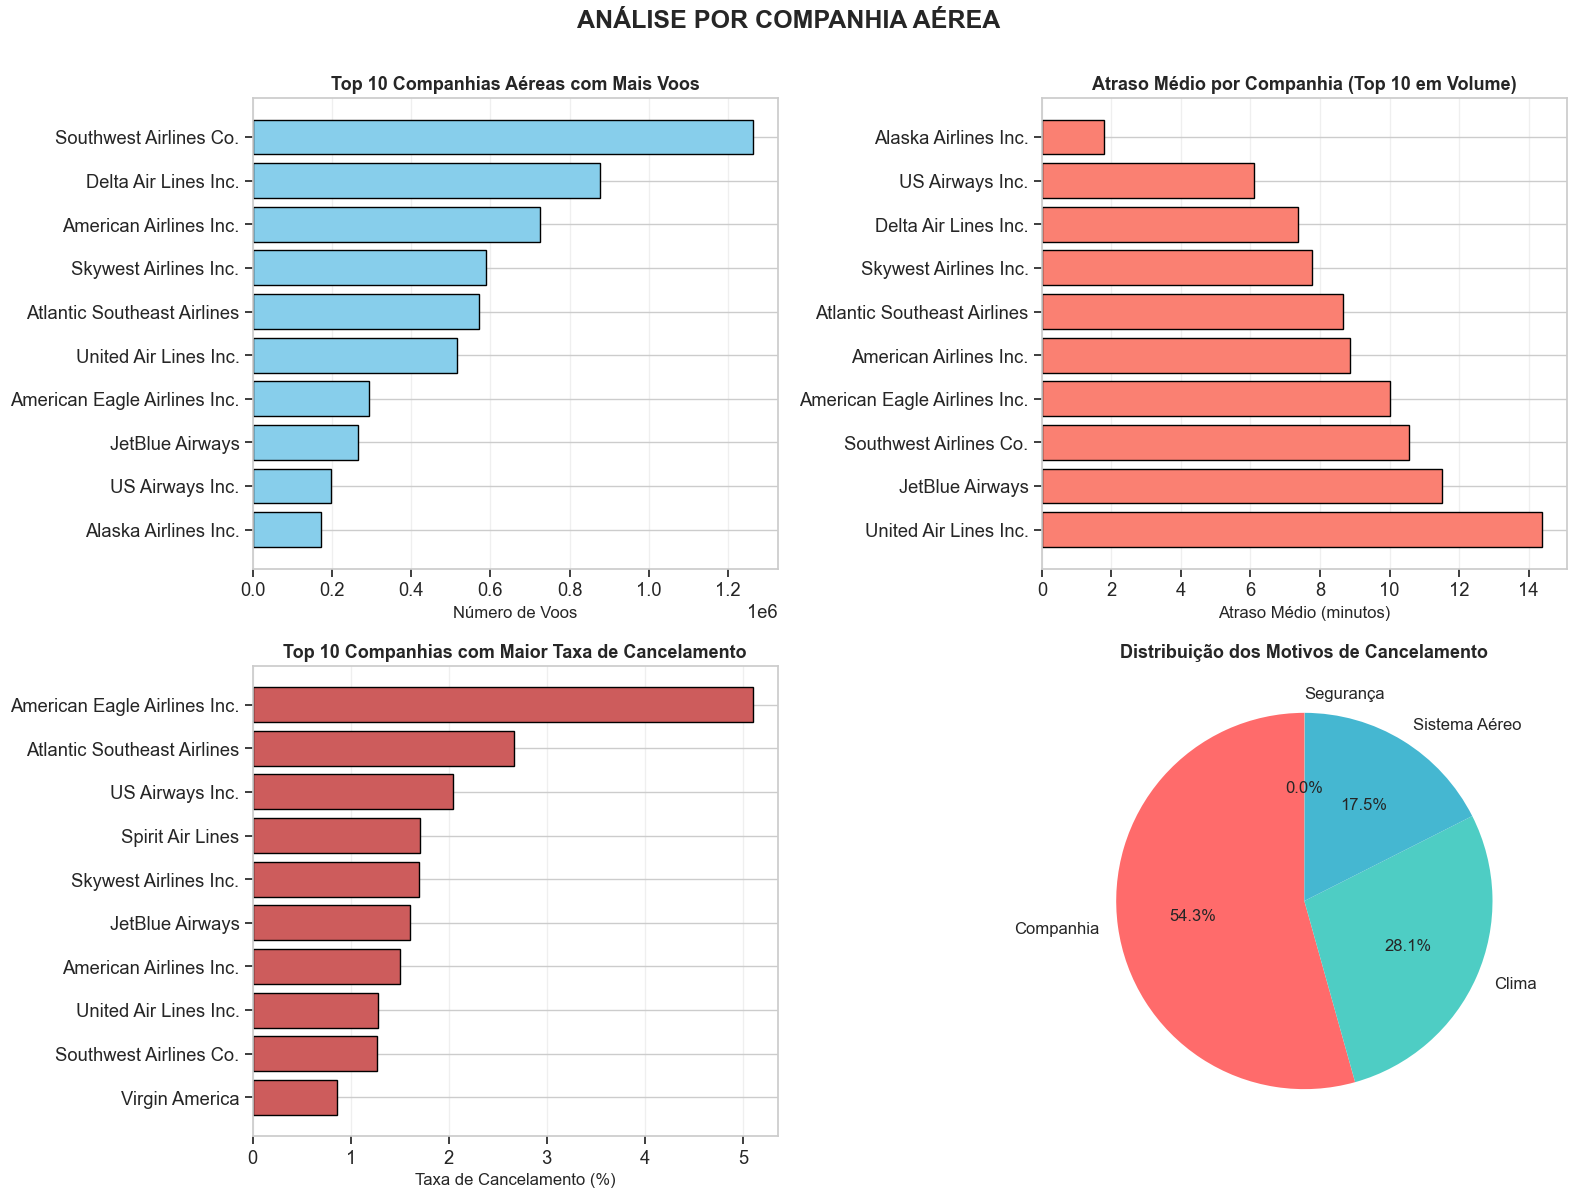

✓ Gráfico 3 salvo: visualizacoes/03_analise_companhias.png


In [11]:
# ==================================================================================
# 4. VISUALIZAÇÃO: ANÁLISE POR COMPANHIA AÉREA
# ==================================================================================
print("\n4. Criando visualizações por companhia aérea...")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('ANÁLISE POR COMPANHIA AÉREA', fontsize=18, fontweight='bold', y=1.00)

# 4.1 Top 10 companhias com mais voos
top_airlines = df_flights_with_names['AIRLINE_y'].value_counts().head(10)
axes[0, 0].barh(range(len(top_airlines)), top_airlines.values, color='skyblue', edgecolor='black')
axes[0, 0].set_yticks(range(len(top_airlines)))
axes[0, 0].set_yticklabels(top_airlines.index)
axes[0, 0].set_xlabel('Número de Voos', fontsize=12)
axes[0, 0].set_title('Top 10 Companhias Aéreas com Mais Voos', fontsize=13, fontweight='bold')
axes[0, 0].invert_yaxis()
axes[0, 0].grid(True, alpha=0.3, axis='x')

# 4.2 Atraso médio por companhia (top 10 em volume)
top_airlines_codes = df_flights_with_names['AIRLINE_y'].value_counts().head(10).index
df_top_airlines = df_flights_with_names[df_flights_with_names['AIRLINE_y'].isin(top_airlines_codes)]
df_top_airlines_not_cancelled = df_top_airlines[df_top_airlines['CANCELLED'] == 0]

airline_avg_delay = df_top_airlines_not_cancelled.groupby('AIRLINE_y')['DEPARTURE_DELAY'].mean().sort_values()
axes[0, 1].barh(range(len(airline_avg_delay)), airline_avg_delay.values, color='salmon', edgecolor='black')
axes[0, 1].set_yticks(range(len(airline_avg_delay)))
axes[0, 1].set_yticklabels(airline_avg_delay.index)
axes[0, 1].set_xlabel('Atraso Médio (minutos)', fontsize=12)
axes[0, 1].set_title('Atraso Médio por Companhia (Top 10 em Volume)', fontsize=13, fontweight='bold')
axes[0, 1].invert_yaxis()
axes[0, 1].grid(True, alpha=0.3, axis='x')

# 4.3 Taxa de cancelamento por companhia
airline_cancel_rate = df_flights_with_names.groupby('AIRLINE_y')['CANCELLED'].mean() * 100
airline_cancel_rate = airline_cancel_rate.sort_values(ascending=False).head(10)
axes[1, 0].barh(range(len(airline_cancel_rate)), airline_cancel_rate.values, color='indianred', edgecolor='black')
axes[1, 0].set_yticks(range(len(airline_cancel_rate)))
axes[1, 0].set_yticklabels(airline_cancel_rate.index)
axes[1, 0].set_xlabel('Taxa de Cancelamento (%)', fontsize=12)
axes[1, 0].set_title('Top 10 Companhias com Maior Taxa de Cancelamento', fontsize=13, fontweight='bold')
axes[1, 0].invert_yaxis()
axes[1, 0].grid(True, alpha=0.3, axis='x')

# 4.4 Motivos de cancelamento
cancel_reasons = df_flights[df_flights['CANCELLED'] == 1]['CANCELLATION_REASON'].value_counts()
cancel_labels = ['Companhia', 'Clima', 'Sistema Aéreo', 'Segurança']
colors_cancel = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']
axes[1, 1].pie(cancel_reasons, labels=cancel_labels, autopct='%1.1f%%', colors=colors_cancel,
               startangle=90, textprops={'fontsize': 12})
axes[1, 1].set_title('Distribuição dos Motivos de Cancelamento', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.savefig(f'{output_dir}/03_analise_companhias.png', 
            dpi=300, bbox_inches='tight')
plt.show()

print(f"✓ Gráfico 3 salvo: {output_dir}/03_analise_companhias.png")



5. Criando visualizações por aeroporto...


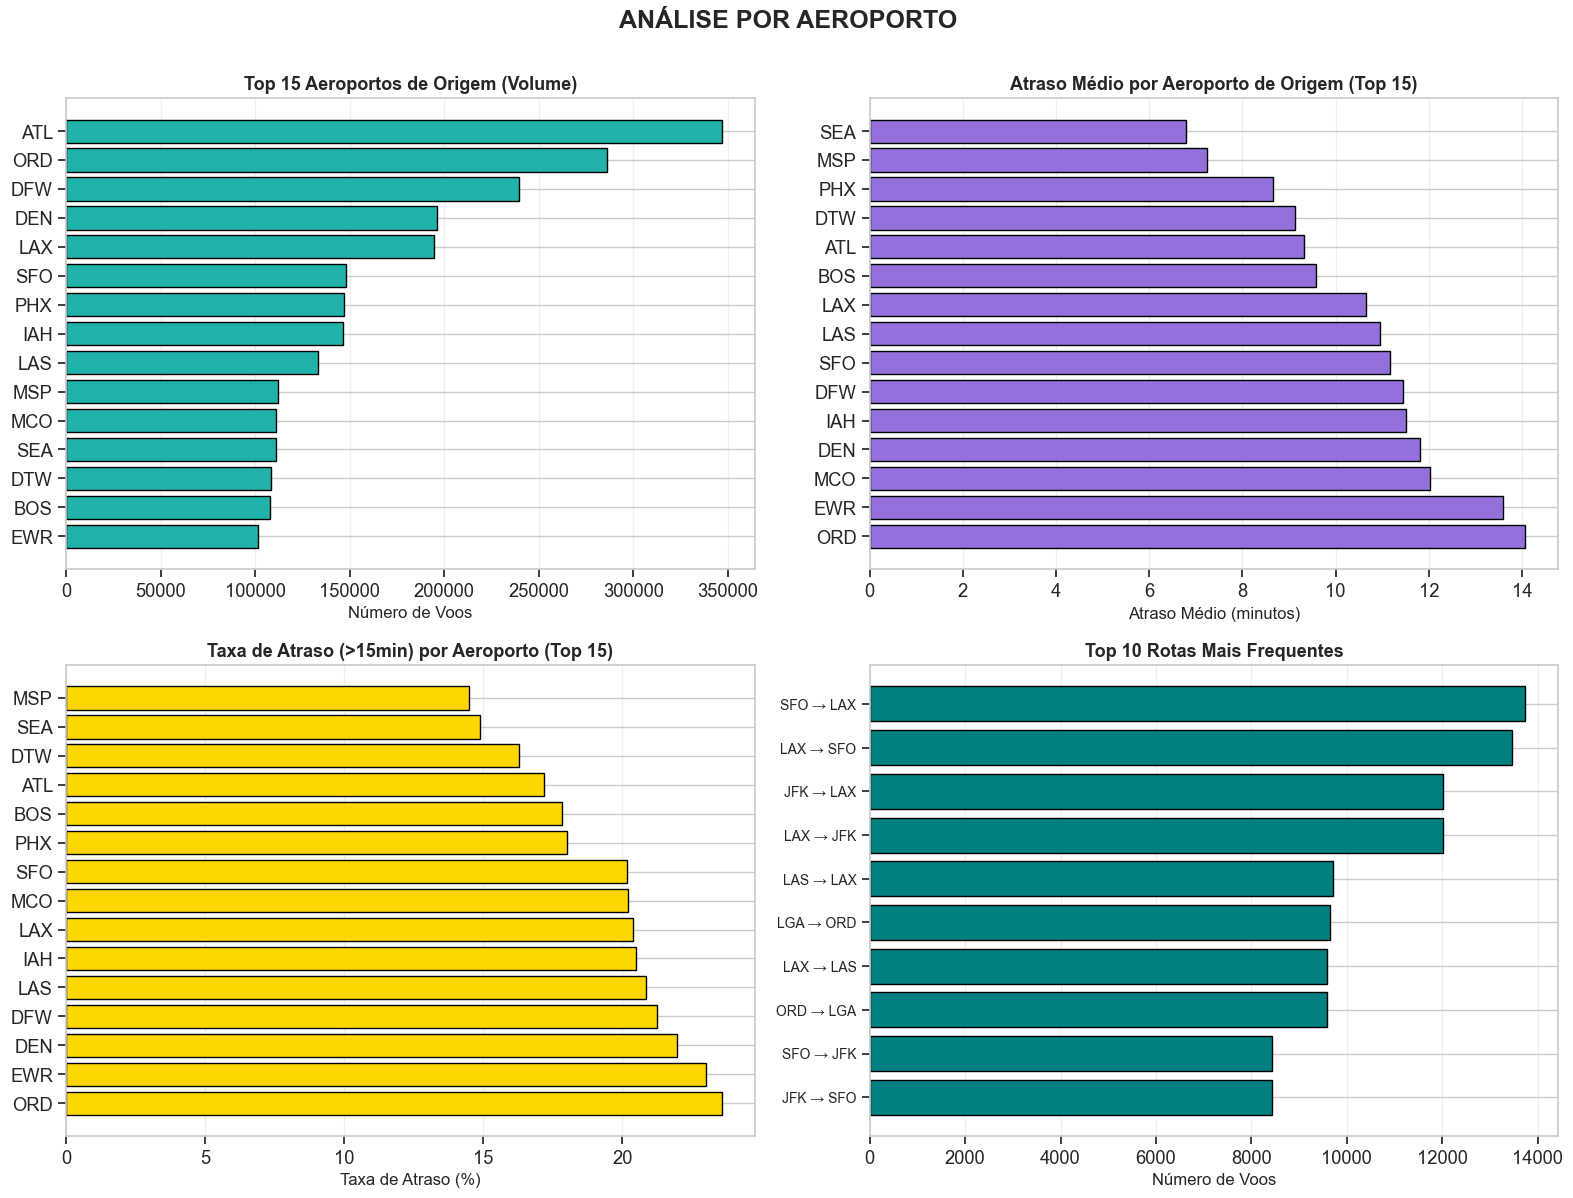

✓ Gráfico 4 salvo: visualizacoes/04_analise_aeroportos.png


In [12]:
# ==================================================================================
# 5. VISUALIZAÇÃO: ANÁLISE POR AEROPORTO
# ==================================================================================
print("\n5. Criando visualizações por aeroporto...")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('ANÁLISE POR AEROPORTO', fontsize=18, fontweight='bold', y=1.00)

# 5.1 Top 15 aeroportos de origem com mais voos
top_origins = df_flights['ORIGIN_AIRPORT'].value_counts().head(15)
axes[0, 0].barh(range(len(top_origins)), top_origins.values, color='lightseagreen', edgecolor='black')
axes[0, 0].set_yticks(range(len(top_origins)))
axes[0, 0].set_yticklabels(top_origins.index)
axes[0, 0].set_xlabel('Número de Voos', fontsize=12)
axes[0, 0].set_title('Top 15 Aeroportos de Origem (Volume)', fontsize=13, fontweight='bold')
axes[0, 0].invert_yaxis()
axes[0, 0].grid(True, alpha=0.3, axis='x')

# 5.2 Atraso médio por aeroporto de origem (top 15 em volume)
top_origin_codes = df_flights['ORIGIN_AIRPORT'].value_counts().head(15).index
df_top_origins = df_not_cancelled[df_not_cancelled['ORIGIN_AIRPORT'].isin(top_origin_codes)]

origin_avg_delay = df_top_origins.groupby('ORIGIN_AIRPORT')['DEPARTURE_DELAY'].mean().sort_values()
axes[0, 1].barh(range(len(origin_avg_delay)), origin_avg_delay.values, color='mediumpurple', edgecolor='black')
axes[0, 1].set_yticks(range(len(origin_avg_delay)))
axes[0, 1].set_yticklabels(origin_avg_delay.index)
axes[0, 1].set_xlabel('Atraso Médio (minutos)', fontsize=12)
axes[0, 1].set_title('Atraso Médio por Aeroporto de Origem (Top 15)', fontsize=13, fontweight='bold')
axes[0, 1].invert_yaxis()
axes[0, 1].grid(True, alpha=0.3, axis='x')

# 5.3 Taxa de atraso por aeroporto de origem (top 15 em volume)
df_top_origins['IS_DELAYED'] = (df_top_origins['DEPARTURE_DELAY'] > 15).astype(int)
origin_delay_rate = df_top_origins.groupby('ORIGIN_AIRPORT')['IS_DELAYED'].mean() * 100
origin_delay_rate = origin_delay_rate.sort_values()

axes[1, 0].barh(range(len(origin_delay_rate)), origin_delay_rate.values, color='gold', edgecolor='black')
axes[1, 0].set_yticks(range(len(origin_delay_rate)))
axes[1, 0].set_yticklabels(origin_delay_rate.index)
axes[1, 0].set_xlabel('Taxa de Atraso (%)', fontsize=12)
axes[1, 0].set_title('Taxa de Atraso (>15min) por Aeroporto (Top 15)', fontsize=13, fontweight='bold')
axes[1, 0].invert_yaxis()
axes[1, 0].grid(True, alpha=0.3, axis='x')

# 5.4 Top 10 rotas mais frequentes
df_flights['ROUTE'] = df_flights['ORIGIN_AIRPORT'].astype(str) + ' → ' + df_flights['DESTINATION_AIRPORT'].astype(str)
top_routes = df_flights['ROUTE'].value_counts().head(10)
axes[1, 1].barh(range(len(top_routes)), top_routes.values, color='teal', edgecolor='black')
axes[1, 1].set_yticks(range(len(top_routes)))
axes[1, 1].set_yticklabels(top_routes.index, fontsize=10)
axes[1, 1].set_xlabel('Número de Voos', fontsize=12)
axes[1, 1].set_title('Top 10 Rotas Mais Frequentes', fontsize=13, fontweight='bold')
axes[1, 1].invert_yaxis()
axes[1, 1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig(f'{output_dir}/04_analise_aeroportos.png', 
            dpi=300, bbox_inches='tight')
plt.show()

print(f"✓ Gráfico 4 salvo: {output_dir}/04_analise_aeroportos.png")



6. Criando matriz de correlação...


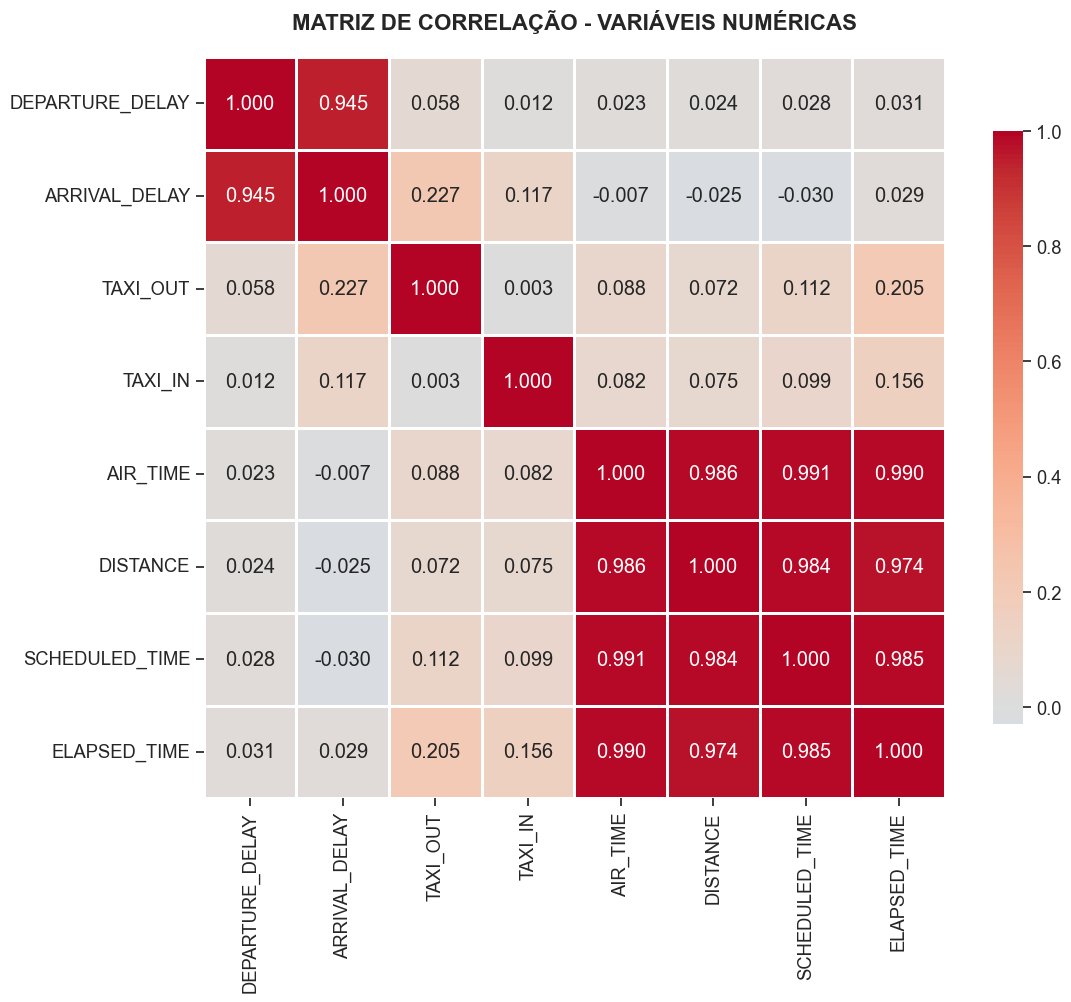

✓ Gráfico 5 salvo: visualizacoes/05_matriz_correlacao.png


In [13]:
# ==================================================================================
# 6. VISUALIZAÇÃO: MATRIZ DE CORRELAÇÃO
# ==================================================================================
print("\n6. Criando matriz de correlação...")

# Selecionar variáveis numéricas relevantes
correlation_vars = ['DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'TAXI_OUT', 'TAXI_IN', 
                    'AIR_TIME', 'DISTANCE', 'SCHEDULED_TIME', 'ELAPSED_TIME']

correlation_data = df_not_cancelled[correlation_vars].dropna()
correlation_matrix = correlation_data.corr()

fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=ax)
ax.set_title('MATRIZ DE CORRELAÇÃO - VARIÁVEIS NUMÉRICAS', fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig(f'{output_dir}/05_matriz_correlacao.png', 
            dpi=300, bbox_inches='tight')
plt.show()

print(f"✓ Gráfico 5 salvo: {output_dir}/05_matriz_correlacao.png")



7. Criando visualizações de análise de distância...


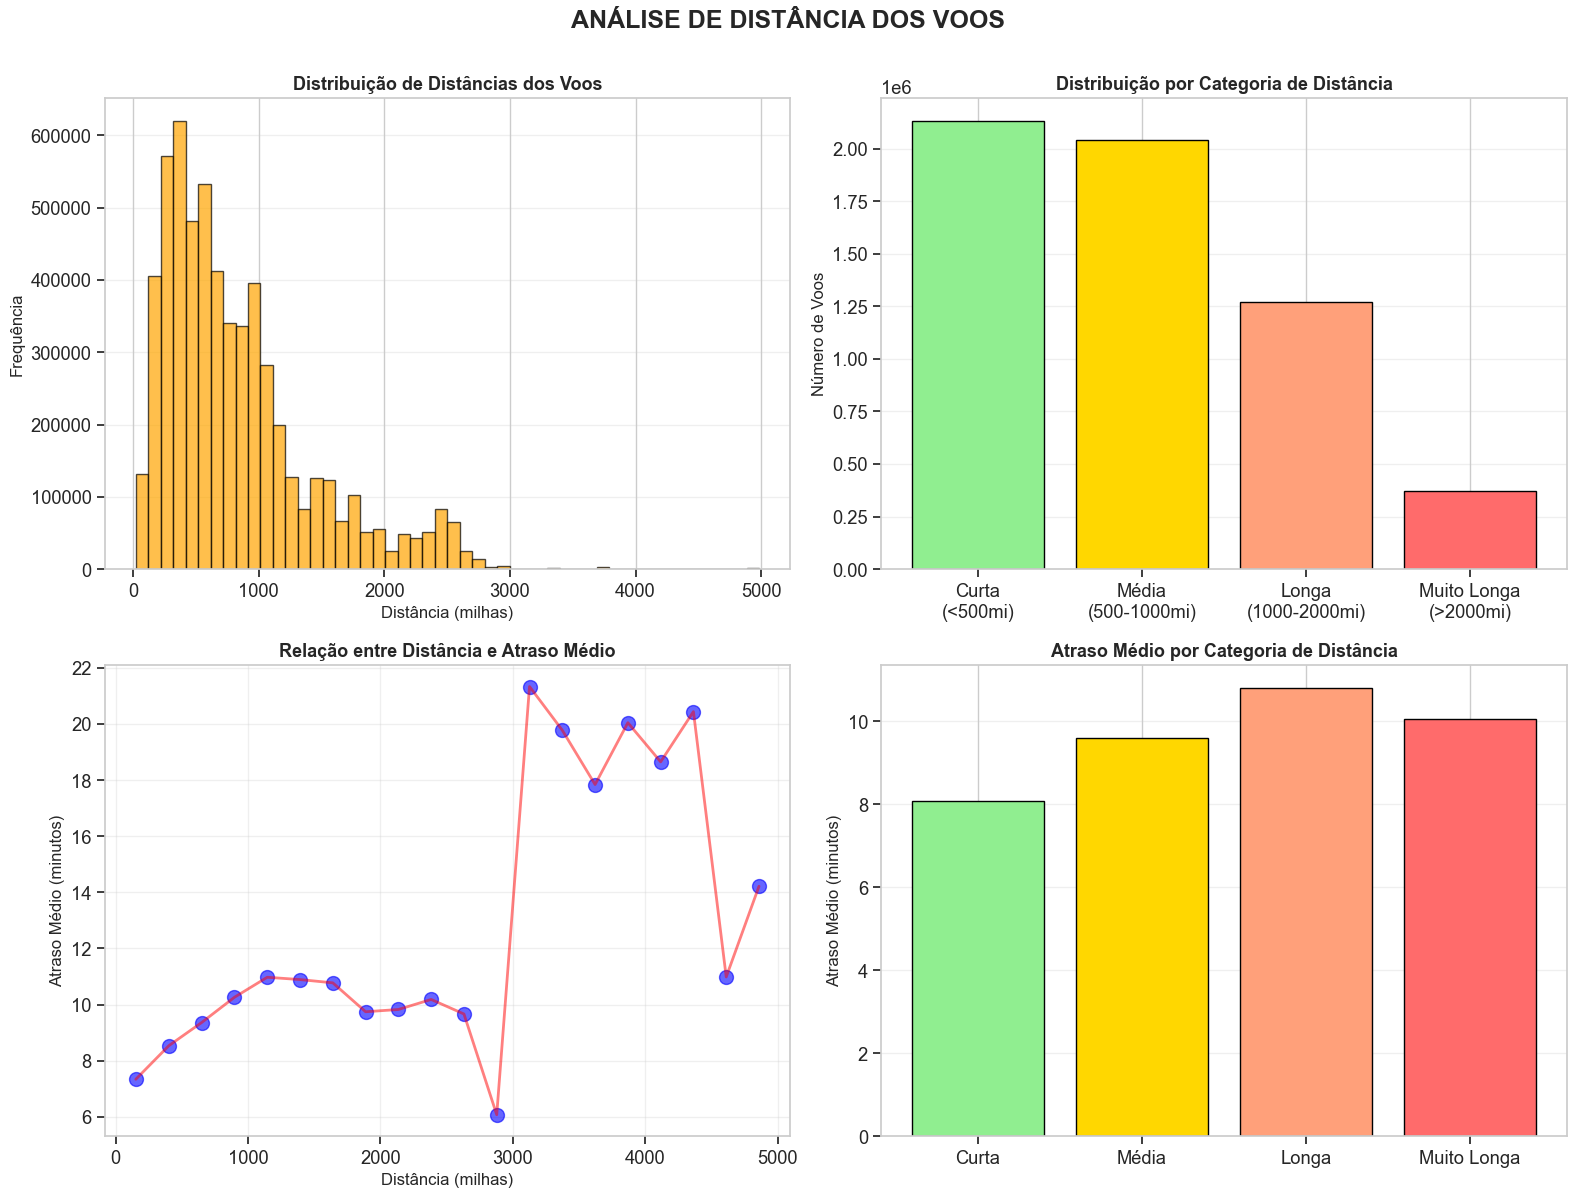

✓ Gráfico 6 salvo: visualizacoes/06_analise_distancia.png


In [14]:
# ==================================================================================
# 7. VISUALIZAÇÃO: ANÁLISE DE DISTÂNCIA
# ==================================================================================
print("\n7. Criando visualizações de análise de distância...")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('ANÁLISE DE DISTÂNCIA DOS VOOS', fontsize=18, fontweight='bold', y=1.00)

# 7.1 Distribuição de distâncias
axes[0, 0].hist(df_flights['DISTANCE'], bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[0, 0].set_xlabel('Distância (milhas)', fontsize=12)
axes[0, 0].set_ylabel('Frequência', fontsize=12)
axes[0, 0].set_title('Distribuição de Distâncias dos Voos', fontsize=13, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3, axis='y')

# 7.2 Categorias de distância
df_flights['DISTANCE_CATEGORY'] = pd.cut(df_flights['DISTANCE'], 
                                          bins=[0, 500, 1000, 2000, 5000],
                                          labels=['Curta\n(<500mi)', 'Média\n(500-1000mi)', 
                                                 'Longa\n(1000-2000mi)', 'Muito Longa\n(>2000mi)'])

distance_counts = df_flights['DISTANCE_CATEGORY'].value_counts()
axes[0, 1].bar(range(len(distance_counts)), distance_counts.values, 
               color=['#90EE90', '#FFD700', '#FFA07A', '#FF6B6B'], edgecolor='black')
axes[0, 1].set_xticks(range(len(distance_counts)))
axes[0, 1].set_xticklabels(distance_counts.index)
axes[0, 1].set_ylabel('Número de Voos', fontsize=12)
axes[0, 1].set_title('Distribuição por Categoria de Distância', fontsize=13, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3, axis='y')

# 7.3 Relação entre distância e atraso
# Agrupar distâncias em bins para análise
df_not_cancelled['DISTANCE_BIN'] = pd.cut(df_not_cancelled['DISTANCE'], bins=20)
distance_delay = df_not_cancelled.groupby('DISTANCE_BIN')['DEPARTURE_DELAY'].mean()

# Extrair ponto médio de cada bin para plotagem
distance_midpoints = [interval.mid for interval in distance_delay.index]

axes[1, 0].scatter(distance_midpoints, distance_delay.values, alpha=0.6, s=100, color='blue')
axes[1, 0].plot(distance_midpoints, distance_delay.values, color='red', linewidth=2, alpha=0.5)
axes[1, 0].set_xlabel('Distância (milhas)', fontsize=12)
axes[1, 0].set_ylabel('Atraso Médio (minutos)', fontsize=12)
axes[1, 0].set_title('Relação entre Distância e Atraso Médio', fontsize=13, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# 7.4 Atraso médio por categoria de distância
df_not_cancelled['DISTANCE_CATEGORY'] = pd.cut(df_not_cancelled['DISTANCE'], 
                                                bins=[0, 500, 1000, 2000, 5000],
                                                labels=['Curta', 'Média', 'Longa', 'Muito Longa'])

category_delay = df_not_cancelled.groupby('DISTANCE_CATEGORY')['DEPARTURE_DELAY'].mean()
axes[1, 1].bar(range(len(category_delay)), category_delay.values,
               color=['#90EE90', '#FFD700', '#FFA07A', '#FF6B6B'], edgecolor='black')
axes[1, 1].set_xticks(range(len(category_delay)))
axes[1, 1].set_xticklabels(category_delay.index)
axes[1, 1].set_ylabel('Atraso Médio (minutos)', fontsize=12)
axes[1, 1].set_title('Atraso Médio por Categoria de Distância', fontsize=13, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig(f'{output_dir}/06_analise_distancia.png', 
            dpi=300, bbox_inches='tight')
plt.show()

print(f"✓ Gráfico 6 salvo: {output_dir}/06_analise_distancia.png")
